In [1]:
from twoboxCol import *
import pickle
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def twoboxColGenerate(parameters, sample_length, sample_number):
    #datestring = datetime.strftime(datetime.now(), '%Y-%m-%d-%H-%M-%S')
    datestring = datetime.strftime(datetime.now(), '%m%d%Y(%H%M)')   # current time used to set file name


    print("\nSet the parameters of the model... \n")
    ### Set all related parameters
    discount = 0.99  # temporal discount , used to solve the MDP with value iteration

    nq = 5  # number of belief states per box
    nr = 2  # number of reward states
    nl = 3  # number of location states
    na = 5
    
#     beta = parameters[0]
#     gamma1 = parameters[1]
#     gamma2 = parameters[2]
#     delta =  parameters[3]
#     direct = parameters[4]
#     epsilon1 = parameters[5]
#     epsilon2 = parameters[6]
#     rho = parameters[7]
#     # State rewards
#     Reward = 1 
#     groom = parameters[8]
#     # Action costs
#     travelCost = parameters[9]
#     pushButtonCost = parameters[10]
    
    beta = 0     # available food dropped back into box after button press
    gamma1 = parameters[0]   # reward becomes available in box 1
    gamma2 = parameters[1]   # reward becomes available in box 2
    delta = 0    # animal trips, doesn't go to target location
    direct = 0   # animal goes right to target, skipping location 0
    epsilon1 = parameters[2] # available food disappears from box 1
    epsilon2 = parameters[3] # available food disappears from box 2
    rho = 1      # food in mouth is consumed
    # State rewards
    Reward = 1   # reward per time step with food in mouth
    groom = parameters[4]     # location 0 reward
    # Action costs
    travelCost = parameters[5]
    pushButtonCost = parameters[6]
        
    NumCol = np.rint(parameters[7]).astype(int)   # number of colors
    Ncol = NumCol - 1  # max value of color
    qmin = parameters[8]
    qmax = parameters[9]
    
    #parameters = [gamma1, gamma2, epsilon1, epsilon2,
    #              groom, travelCost, pushButtonCost, NumCol, qmin, qmax]

    ### Solving the MDP problem with given parameters

    print("Solving the belief MDP...")
    twoboxCol = twoboxColMDP(discount, nq, nr, na, nl, parameters)
    twoboxCol.setupMDP()
    twoboxCol.solveMDP_sfm(initial_value = 0)

    fig  = plt.figure(figsize = (20, 2))
    ax = fig.add_subplot(111)
    policyfig =  ax.imshow(twoboxCol.softpolicy)
    fig.colorbar(policyfig)
    plt.show()

    ### Gnerate data"""
    print("Generate data based on the true model...")
    T = sample_length
    N = sample_number
    twoboxColdata = twoboxColMDPdata(discount, nq, nr, na, nl, parameters, T, N)
    twoboxColdata.dataGenerate_sfm(belief1Initial=0, rewInitial=0, belief2Initial=0, locationInitial=0)
    #twoboxdata.dataGenerate_op(belief1Initial=0, rewInitial=0, belief2Initial=0, locationInitial=0)
    hybrid = twoboxColdata.hybrid
    action = twoboxColdata.action
    location = twoboxColdata.location
    belief1 = twoboxColdata.belief1
    belief2 = twoboxColdata.belief2
    reward = twoboxColdata.reward
    trueState1 = twoboxColdata.trueState1
    trueState2 = twoboxColdata.trueState2
    color1 = twoboxColdata.color1
    color2 = twoboxColdata.color2

    # sampleNum * sampleTime * dim of observations(=3 here, action, reward, location)
    # organize data
    obsN = np.dstack([action, reward, location, color1, color2])  # includes the action and the observable states
    latN = np.dstack([belief1, belief2])
    truthN = np.dstack([trueState1, trueState2])
    #dataN = np.dstack([obsN, latN, truthN])

    return obsN, latN, truthN

In [ ]:
### write data to file
data_dict = {'observations': obsN,
             'beliefs': latN,
             'trueStates': truthN,
             'allData': dataN}
data_output = open(datestring + '_dataN_twobox' + '.pkl', 'wb')
pickle.dump(data_dict, data_output)
data_output.close()

### write all model parameters to file
para_dict = {'discount': discount,
             'nq': nq,
             'nr': nr,
             'nl': nl,
             'na': na,
             'appRate1': gamma1,
             'appRate2': gamma2,
             'disappRate1': epsilon1,
             'disappRate2': epsilon2,
             'reward': 1,
             'groom': groom,
             'travelCost': travelCost,
             'pushButtonCost': pushButtonCost,
             'colorNum': NumCol,
             'qmin':qmin,
             'qmax':qmax
             }
para_output = open(datestring + '_para_twoboxCol' + '.pkl', 'wb')
pickle.dump(para_dict, para_output)
para_output.close()

pkl_file1 = open(datestring + '_para_twoboxCol' + '.pkl', 'rb')
para_pkl = pickle.load(pkl_file1)
pkl_file1.close()

print('Data stored in files' )

In [3]:
#parameters = [gamma1, gamma2, epsilon1, epsilon2,
#              groom, travelCost, pushButtonCost, NumCol, qmin, qmax]
NumCol = 5
parameters = [0.1, 0.1, 0.01, 0.01, 
              0.05, 0.2, 0.3, NumCol, 0.4, 0.6]
Ncol = NumCol - 1

In [4]:
sampleTime = 500

In [5]:
discount = 0.99 

nq = 5  # number of belief states per box
nr = 2  # number of reward states
nl = 3  # number of location states
na = 5


Set the parameters of the model... 

Solving the belief MDP...


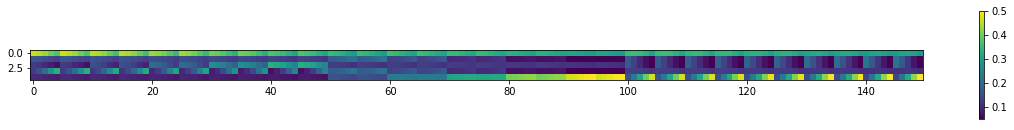

Generate data based on the true model...


In [6]:
obsN, latN, truthN = twoboxColGenerate(parameters, sampleTime, sample_number = 1)

In [7]:
#obsN = np.dstack([action, reward, location, color1, color2])  # includes the action and the observable states
#latN = np.dstack([belief1, belief2])
#truthN = np.dstack([trueState1, trueState2])

In [8]:
trueState1 = truthN[0, :, 0]
trueState2 = truthN[0, :, 1]

action = obsN[0, :, 0]
reward = obsN[0, :, 1]
location = obsN[0, :, 2]
color1 = obsN[0, :, 3]
color2 = obsN[0, :, 4]

belief1 = latN[0, :, 0]
belief2 = latN[0, :, 1]

In [9]:
showtime = 50
showtime_start = 200

In [10]:
data_true1 = trueState1[showtime_start : showtime_start+showtime]
data_true2 = trueState2[showtime_start : showtime_start+showtime]
data_action = action[showtime_start : showtime_start+showtime]
data_location = location[showtime_start : showtime_start+showtime]
data_reward = reward[showtime_start : showtime_start+showtime]
data_color1 = color1[showtime_start : showtime_start+showtime]
data_color2 = color2[showtime_start : showtime_start+showtime]


data_belief1 = np.reshape((belief1[showtime_start : showtime_start+showtime] + 1/2) / float(nq), showtime)
data_belief2 = np.reshape((belief2[showtime_start : showtime_start+showtime] + 1/2) / float(nq), showtime)
#data_hybrid = np.reshape(hybrid, sampleTime)

actiontemp  = data_action * (1 * (data_action % pb == 0)) / pb
locationtemp = data_location * (1 * (data_location == 2)) + (1 - data_location) * (1 * (data_location != 2))


colormapR1 = (Ncol - data_color1)* 255 / Ncol
colormapG1 = np.zeros(np.shape(data_color1))
colormapB1 = data_color1 * 255 / Ncol
colorimage1 = np.dstack((colormapR1, colormapG1, colormapB1))
colorImageShow1 = np.array(colorimage1, dtype=np.uint8)

colormapR2 = (Ncol - data_color2)* 255 / Ncol
colormapG2 = np.zeros(np.shape(data_color2))
colormapB2 = data_color2 * 255 / Ncol
colorimage2 = np.dstack((colormapR2, colormapG2, colormapB2))
colorImageShow2 = np.array(colorimage2, dtype=np.uint8)


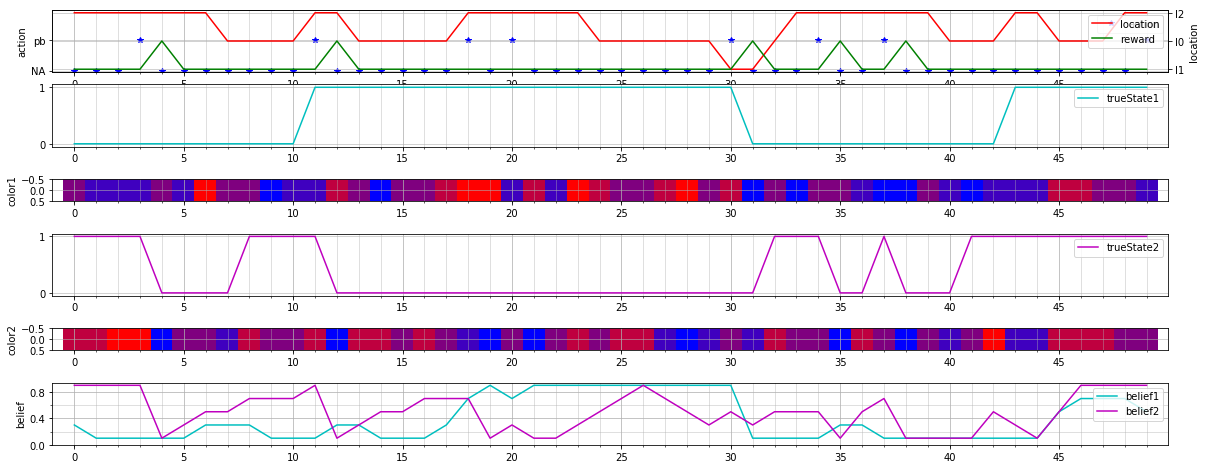

In [11]:
time = np.arange(0, showtime, 1)

fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(611)
#ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(612)
ax4 = fig.add_subplot(613)
ax5 = fig.add_subplot(614)
ax6 = fig.add_subplot(615)
ax7 = fig.add_subplot(616)

ax1.plot(time, actiontemp, 'b*', label= 'action')
ax1.legend(loc=1)
ax1.set_xticks(np.arange(0, showtime, 5))
ax1.set_xticks(np.arange(0, showtime, 1), minor = True)
ax1.set_yticks(np.arange(0, 3, 1))
a=ax1.get_yticks().tolist()
a[0]='NA'
a[1] = 'pb'
ax1.set_xlim(-1, showtime)
ax1.set_yticklabels(a)
ax1.set_yticks(ax1.get_yticks()[0:2])
ax1.grid(which = 'minor', alpha = 0.5)
ax1.grid(which = 'major', alpha = 0.7)
ax1.set_ylabel('action')

ax2 = ax1.twinx()
ax2.plot(time, locationtemp, 'r', label= 'location' )
ax2.plot(time, data_reward, 'g', label= 'reward')
ax2.legend(loc=1)
ax2.set_xticks(np.arange(0, showtime, 5))
ax2.set_xticks(np.arange(0, showtime, 1), minor = True)
ax2.set_yticks(np.arange(0, 3, 1))
ax2.set_yticks(ax2.get_yticks()[0:nl])
b=ax2.get_yticks().tolist()
b[0]='l1'
b[1] = 'l0'
b[2] = 'l2'
ax2.set_yticklabels(b)
ax2.grid(which = 'minor', alpha = 0.5)
ax2.grid(which = 'major', alpha = 0.7)
ax2.set_ylabel('location')

ax3.plot(time, data_true1, 'c', label= 'trueState1' )
#ax3.plot(time, data_true2, 'm', label= 'trueState2' )
ax3.legend(loc=1)
ax3.set_xlim(-1, showtime)
ax3.set_xticks(np.arange(0, showtime, 5))
ax3.set_xticks(np.arange(0, showtime, 1), minor = True)
ax3.set_yticks(np.arange(0, 1.2))
ax3.grid(which = 'minor', alpha = 0.5)
ax3.grid(which = 'major', alpha = 0.7)

ax4.imshow(colorImageShow1, interpolation='none')
#ax4.legend(loc=1)
ax4.set_xlim(-1, showtime)
ax4.set_xticks(np.arange(0, showtime, 5))
ax4.set_xticks(np.arange(0, showtime, 1), minor=True)
#ax4.set_yticks(np.arange(0, Ncol + 1))
ax4.grid(which='minor', alpha=0.5)
ax4.grid(which='major', alpha=0.7)
ax4.set_ylabel('color1')

#ax4.plot(time, data_true1, 'c', label= 'trueState1' )
ax5.plot(time, data_true2, 'm', label= 'trueState2' )
ax5.legend(loc=1)
ax5.set_xlim(-1, showtime)
ax5.set_xticks(np.arange(0, showtime, 5))
ax5.set_xticks(np.arange(0, showtime, 1), minor = True)
ax5.set_yticks(np.arange(0, 1.2))
ax5.grid(which = 'minor', alpha = 0.5)
ax5.grid(which = 'major', alpha = 0.7)

ax6.imshow(colorImageShow2, interpolation='none')
#ax6.legend(loc=1)
ax6.set_xlim(-1, showtime)
ax6.set_xticks(np.arange(0, showtime, 5))
ax6.set_xticks(np.arange(0, showtime, 1), minor=True)
#ax6.set_yticks(np.arange(0, Ncol + 1))
ax6.grid(which='minor', alpha=0.5)
ax6.grid(which='major', alpha=0.7)
ax6.set_ylabel('color2')


ax7.plot(time, data_belief1, 'c', label= 'belief1')
ax7.plot(time, data_belief2, 'm', label= 'belief2')
ax7.legend(loc=1)
ax7.set_xlim(-1, showtime)
ax7.set_xticks(np.arange(0, showtime, 5))
ax7.set_xticks(np.arange(0, showtime, 1), minor = True)
ax7.set_yticks(np.arange(0, 1, 2 * 1/ float(nq)))
ax7.set_yticks(np.arange(0, 1, 1/ float(nq)), minor = True)
ax7.grid(which = 'minor', alpha = 0.5)
ax7.grid(which = 'major', alpha = 0.7)
ax7.set_ylabel('belief')

plt.show()

# Check forward-backward algorithm 

In [12]:
from HMMtwoboxCol import *

In [13]:
twoboxCol = twoboxColMDP(0.99, nq, nr, na, nl, parameters)
twoboxCol.setupMDP()
twoboxCol.solveMDP_sfm(initial_value = 0)

In [14]:
obs = obsN[0]
lat = latN[0]

In [15]:
pi = np.ones(nq * nq) / nq / nq
twoColHMM = HMMtwoboxCol(twoboxCol.ThA, twoboxCol.softpolicy, twoboxCol.Trans_hybrid_obs12,
                         twoboxCol.Obs_emis_trans1, twoboxCol.Obs_emis_trans2, pi, NumCol - 1)
alpha, scale = twoColHMM.forward_scale(obs)
beta = twoColHMM.backward_scale(obs, scale)
gamma = twoColHMM.compute_gamma(alpha, beta)
xi = twoColHMM.compute_xi(alpha, beta, obs)

# Contour

# Inference

In [16]:
obs = obsN[0]
lat = latN[0]

In [17]:
#parameters = [gamma1, gamma2, epsilon1, epsilon2,
#              groom, travelCost, pushButtonCost, NumCol, qmin, qmax]
parameters

[0.1, 0.1, 0.01, 0.01, 0.05, 0.2, 0.3, 5, 0.4, 0.6]

In [24]:
gamma1_ini = 0.5
epsilon1_ini = 0.3
gamma2_ini = 0.5
epsilon2_ini = 0.3
groomCost_ini = 0.2
travelCost_ini = 0.1
pushButtonCost_ini = 0.4
NumCol_ini = NumCol
qmin_ini = 0.2
qmax_ini = 0.7

parameters_ini = [gamma1_ini, gamma2_ini, epsilon1_ini, epsilon2_ini,
                  groomCost_ini, pushButtonCost_ini, pushButtonCost_ini,  
                  NumCol_ini, qmin_ini, qmax_ini]
parameters_ini = np.copy(parameters)
parameters_old = np.copy(parameters_ini)

print("The true paramters are:               ", parameters )
print("The initial estimation parameters are:", parameters_ini) 
print ("Now starting with some initialized value of the parameters, we are going to use EM(G) " \
"algorithm for parameter estimation:")

The true paramters are:                [0.1, 0.1, 0.01, 0.01, 0.05, 0.2, 0.3, 5, 0.4, 0.6]
The initial estimation parameters are: [0.1  0.1  0.01 0.01 0.05 0.2  0.3  5.   0.4  0.6 ]
Now starting with some initialized value of the parameters, we are going to use EM(G) algorithm for parameter estimation:


In [25]:
sampleIndex = [0]
NN = len(sampleIndex)

In [30]:
parameters_iniSet = [parameters_ini]
E_MAX_ITER = 300       # 100    # maximum number of iterations of E-step
GD_THRESHOLD = 0.015   # 0.01      # stopping criteria of M-step (gradient descent)
E_EPS = 10 ** -8                  # stopping criteria of E-step
M_LR_INI = 5 * 10 ** -7           # initial learning rate in the gradient descent step
LR_DEC =  5                       # number of times that the learning rate can be reduced

In [31]:
#### EM algorithm for parameter estimation
print("\nEM algorithm begins ...")
# NN denotes multiple data set, and MM denotes multiple initial points
NN_MM_para_old_traj = []

NN_MM_para_new_traj = []
NN_MM_log_likelihoods_old = []
NN_MM_log_likelihoods_new = []
NN_MM_log_likelihoods_com_old = []  # old posterior, old parameters
NN_MM_log_likelihoods_com_new = []  # old posterior, new parameters
NN_MM_latent_entropies = []

NN_likelihoods = []

for nn in range(NN):

    print("\nFor the", sampleIndex[nn] + 1, "-th set of data:")

    ##############################################################
    # Compute likelihood
    lat = latN[sampleIndex[nn]]
    obs = obsN[sampleIndex[nn], :, :]

    MM = len(parameters_iniSet)

    MM_para_old_traj = []
    MM_para_new_traj = []
    MM_log_likelihoods_old = []
    MM_log_likelihoods_new = []
    MM_log_likelihoods_com_old = []  # old posterior, old parameters
    MM_log_likelihoods_com_new = []  # old posterior, new parameters
    MM_latent_entropies = []

    for mm in range(MM):
        parameters_old = np.copy(parameters_iniSet[mm])

        print("\n", mm + 1, "-th initial estimation:", parameters_old)

        itermax = E_MAX_ITER  # 100  # iteration number for the EM algorithm
        eps = E_EPS  # Stopping criteria for E-step in EM algorithm

        para_old_traj = []
        para_new_traj = []

        log_likelihoods_old = []
        log_likelihoods_new = []
        log_likelihoods_com_old = []  # old posterior, old parameters
        log_likelihoods_com_new = []  # old posterior, new parameters
        latent_entropies = []

        count_E = 0
        while count_E < itermax:

            print("\n The", count_E + 1, "-th iteration of the EM(G) algorithm")

            if count_E == 0:
                parameters_old = np.copy(parameters_iniSet[mm])
            else:
                parameters_old = np.copy(parameters_new)  # update parameters

            para_old_traj.append(parameters_old)

            ##########  E-step ##########

            ## Use old parameters to estimate posterior

            # twoboxGra = twoboxMDPder(discount, nq, nr, na, nl, parameters_old, vinitial)
            twoboxColGra = twoboxColMDPder(discount, nq, nr, na, nl, parameters_old)
            ThA_old = twoboxColGra.ThA
            softpolicy_old = twoboxColGra.softpolicy
            Trans_hybrid_obs12_old = twoboxColGra.Trans_hybrid_obs12
            Obs_emis_trans1_old = twoboxColGra.Obs_emis_trans1
            Obs_emis_trans2_old = twoboxColGra.Obs_emis_trans2
            Ncol_old = parameters_old[7].astype(int) - 1
            pi = np.ones(nq * nq) / nq / nq
            twoColHMM = HMMtwoboxCol(ThA_old, softpolicy_old, Trans_hybrid_obs12_old,
                                     Obs_emis_trans1_old, Obs_emis_trans2_old, pi, Ncol_old)

            ## Calculate likelihood of observed and complete date, and entropy of the latent sequence
            complete_likelihood_old = twoColHMM.computeQaux(obs, ThA_old, softpolicy_old, Trans_hybrid_obs12_old)
            latent_entropy = twoColHMM.latent_entr(obs)
            log_likelihood = complete_likelihood_old + latent_entropy

            log_likelihoods_com_old.append(complete_likelihood_old)
            latent_entropies.append(latent_entropy)
            log_likelihoods_old.append(log_likelihood)

            print(parameters_old)
            print(complete_likelihood_old)
            print(log_likelihood)

            ## Check convergence
            if len(log_likelihoods_old) >= 2 and np.abs(log_likelihood - log_likelihoods_old[-2]) < eps:
                print("EM has converged!")
                break

            ##########  M(G)-step ##########

            count_M = 0
            vinitial = 0
            para_new_traj.append([])
            log_likelihoods_com_new.append([])
            log_likelihoods_new.append([])

            learnrate_ini = M_LR_INI
            learnrate = learnrate_ini

            # Start the gradient descent from the old parameters
            parameters_new = np.copy(parameters_old)
            complete_likelihood_new = complete_likelihood_old
            log_likelihood = complete_likelihood_new + latent_entropy

            para_new_traj[count_E].append(parameters_new)
            log_likelihoods_com_new[count_E].append(complete_likelihood_new)
            log_likelihoods_new[count_E].append(log_likelihood)

            print("    M-step")
            print("     ", parameters_new)
            print("     ", complete_likelihood_new)
            print("     ", log_likelihood)

            while True:

                derivative_value = twoboxColGra.dQauxdpara_sim(obs, parameters_new)
                # vinitial is value from previous iteration, this is for computational efficiency
                para_temp = parameters_new + learnrate * np.array(derivative_value)
                #vinitial = derivative_value[-1]  # value iteration starts with value from previous iteration

                ## Check the ECDLL (old posterior, new parameters)
                twoboxCol_new = twoboxColMDP(discount, nq, nr, na, nl, para_temp)
                twoboxCol_new.setupMDP()
                twoboxCol_new.solveMDP_sfm()
                ThA_new = twoboxCol_new.ThA
                softpolicy_new = twoboxCol_new.softpolicy
                Trans_hybrid_obs12_new = twoboxCol_new.Trans_hybrid_obs12
                complete_likelihood_new_temp = twoColHMM.computeQaux(obs, ThA_new,
                                                                     softpolicy_new, Trans_hybrid_obs12_new)

                print("         ", para_temp)
                print("         ", complete_likelihood_new_temp)

                ## Update the parameter if the ECDLL can be improved
                if complete_likelihood_new_temp > complete_likelihood_new + GD_THRESHOLD:
                    parameters_new = np.copy(para_temp)
                    complete_likelihood_new = complete_likelihood_new_temp
                    log_likelihood = complete_likelihood_new + latent_entropy

                    para_new_traj[count_E].append(parameters_new)
                    log_likelihoods_com_new[count_E].append(complete_likelihood_new)
                    log_likelihoods_new[count_E].append(log_likelihood)

                    print("     ", parameters_new)
                    print("     ", complete_likelihood_new)
                    print("     ", log_likelihood)

                    count_M += 1
                else:
                    learnrate /= 2
                    if learnrate < learnrate_ini / (2 ** LR_DEC):
                        break

            count_E += 1

        MM_para_old_traj.append(para_old_traj)  # parameter trajectories for a particular set of data
        MM_para_new_traj.append(para_new_traj)
        MM_log_likelihoods_old.append(log_likelihoods_old)  # likelihood trajectories for a particular set of data
        MM_log_likelihoods_new.append(log_likelihoods_new)
        MM_log_likelihoods_com_old.append(log_likelihoods_com_old)  # old posterior, old parameters
        MM_log_likelihoods_com_new.append(log_likelihoods_com_new)  # old posterior, new parameters
        MM_latent_entropies.append(latent_entropies)

    NN_MM_para_old_traj.append(MM_para_old_traj)  # parameter trajectories for all data
    NN_MM_para_new_traj.append(MM_para_new_traj)
    NN_MM_log_likelihoods_old.append(MM_log_likelihoods_old)  # likelihood trajectories for
    NN_MM_log_likelihoods_new.append(MM_log_likelihoods_new)
    NN_MM_log_likelihoods_com_old.append(MM_log_likelihoods_com_old)  # old posterior, old parameters
    NN_MM_log_likelihoods_com_new.append(MM_log_likelihoods_com_new)  # old posterior, new parameters
    NN_MM_latent_entropies.append(MM_latent_entropies)



EM algorithm begins ...

For the 1 -th set of data:

 1 -th initial estimation: [0.1  0.1  0.01 0.01 0.05 0.2  0.3  5.   0.4  0.6 ]

 The 1 -th iteration of the EM(G) algorithm
[0.1  0.1  0.01 0.01 0.05 0.2  0.3  5.   0.4  0.6 ]
-2390.6258894537286
-1900.589543097042
    M-step
      [0.1  0.1  0.01 0.01 0.05 0.2  0.3  5.   0.4  0.6 ]
      -2390.6258894537286
      -1900.589543097042
          [0.09998165 0.10003575 0.01003354 0.01001235 0.04999001 0.20000637
 0.30002815 5.         0.40001743 0.59990481]
          -2390.5998537884593
      [0.09998165 0.10003575 0.01003354 0.01001235 0.04999001 0.20000637
 0.30002815 5.         0.40001743 0.59990481]
      -2390.5998537884593
      -1900.5635074317727
          [9.07577255e-02 9.08652176e-02 8.60976982e-04 8.18970237e-04
 4.07741626e-02 1.90806864e-01 2.90850407e-01 5.00000000e+00
 3.90828739e-01 5.90603919e-01]
          -2395.0868196533906
          [0.09536969 0.09545048 0.00544726 0.00541566 0.04538209 0.19540662
 0.29543928 5.  

[0.09990902 0.10017798 0.01016704 0.01006168 0.04994981 0.20003187
 0.30014046 5.         0.4000872  0.59952617]
-2390.5609078381076
-1900.4760506533564
    M-step
      [0.09990902 0.10017798 0.01016704 0.01006168 0.04994981 0.20003187
 0.30014046 5.         0.4000872  0.59952617]
      -2390.5609078381076
      -1900.4760506533564
          [0.09989103 0.10021334 0.01020032 0.01007406 0.04993969 0.20003825
 0.30016847 5.         0.40010447 0.59943215]
          -2390.535433492058
      [0.09989103 0.10021334 0.01020032 0.01007406 0.04993969 0.20003825
 0.30016847 5.         0.40010447 0.59943215]
      -2390.535433492058
      -1900.4505763073068
          [9.08864363e-02 9.12614453e-02 1.24647312e-03 1.09960642e-03
 4.09426929e-02 1.91057719e-01 2.91209565e-01 5.00000000e+00
 3.91134970e-01 5.90351141e-01]
          -2394.815225290516
          [0.09538873 0.09573739 0.0057234  0.00558683 0.04544119 0.19554799
 0.29568902 5.         0.39561972 0.59489165]
          -2391.68383314655

[0.09981983 0.100354   0.01033295 0.01012366 0.04989902 0.20006378
 0.30028025 5.         0.40017342 0.59905828]
-2390.4971256261715
-1900.3650038313276
    M-step
      [0.09981983 0.100354   0.01033295 0.01012366 0.04989902 0.20006378
 0.30028025 5.         0.40017342 0.59905828]
      -2390.4971256261715
      -1900.3650038313276
          [0.09980221 0.10038897 0.01036597 0.01013608 0.0498888  0.20007016
 0.30030813 5.         0.40019063 0.59896536]
          -2390.472182743323
      [0.09980221 0.10038897 0.01036597 0.01013608 0.0498888  0.20007016
 0.30030813 5.         0.40019063 0.59896536]
      -2390.472182743323
      -1900.3400609484793
          [9.10031266e-02 9.16418547e-02 1.61702323e-03 1.36681563e-03
 4.10968370e-02 1.91294785e-01 2.91554250e-01 5.00000000e+00
 3.91426215e-01 5.90090598e-01]
          -2394.5626119567546
          [0.09540267 0.09601541 0.0059915  0.00575145 0.04549282 0.19568247
 0.29593119 5.         0.39580842 0.59452798]
          -2391.5721537895

[0.09973243 0.1005281  0.01049759 0.01018583 0.04984769 0.20009571
 0.3004194  5.         0.40025933 0.59859582]
-2390.4346319554347
-1900.25626103554
    M-step
      [0.09973243 0.1005281  0.01049759 0.01018583 0.04984769 0.20009571
 0.3004194  5.         0.40025933 0.59859582]
      -2390.4346319554347
      -1900.25626103554
          [0.09971516 0.10056269 0.01053037 0.01019829 0.04983736 0.20010209
 0.30044715 5.         0.40027647 0.59850397]
          -2390.4102556174194
      [0.09971516 0.10056269 0.01053037 0.01019829 0.04983736 0.20010209
 0.30044715 5.         0.40027647 0.59850397]
      -2390.4102556174194
      -1900.2318846975247
          [9.11406894e-02 9.20394590e-02 2.00543825e-03 1.65332049e-03
 4.12695674e-02 1.91550985e-01 2.91917404e-01 5.00000000e+00
 3.91736263e-01 5.89854547e-01]
          -2394.2994576855654
          [0.09542793 0.09630107 0.0062679  0.0059258  0.04555347 0.19582654
 0.29618228 5.         0.39600637 0.59417926]
          -2391.458425839089

[0.09964678 0.10070038 0.010661   0.01024818 0.04979586 0.20012765
 0.30055791 5.         0.40034502 0.59813879]
-2390.3735969843874
-1900.1498299872037
    M-step
      [0.09964678 0.10070038 0.010661   0.01024818 0.04979586 0.20012765
 0.30055791 5.         0.40034502 0.59813879]
      -2390.3735969843874
      -1900.1498299872037
          [0.09962985 0.1007346  0.01069353 0.01026067 0.04978544 0.20013404
 0.30058554 5.         0.4003621  0.598048  ]
          -2390.349664195463
      [0.09962985 0.1007346  0.01069353 0.01026067 0.04978544 0.20013404
 0.30058554 5.         0.4003621  0.598048  ]
      -2390.349664195463
      -1900.1258971982793
          [9.12205057e-02 9.23757938e-02 2.33313978e-03 1.88052612e-03
 4.13823321e-02 1.91747719e-01 2.92220452e-01 5.00000000e+00
 3.91986624e-01 5.89564424e-01]
          -2394.0934836383885
          [0.09542518 0.0965552  0.00651333 0.0060706  0.04558388 0.19594088
 0.29640299 5.         0.39617436 0.59380621]
          -2391.3607625645

[0.09956283 0.10087068 0.01082319 0.01031072 0.04974357 0.2001596
 0.3006958  5.         0.40043026 0.59768685]
-2390.3139239633447
-1900.0455076503856
    M-step
      [0.09956283 0.10087068 0.01082319 0.01031072 0.04974357 0.2001596
 0.3006958  5.         0.40043026 0.59768685]
      -2390.3139239633447
      -1900.0455076503856
          [0.09954624 0.10090448 0.01085549 0.01032325 0.04973306 0.20016599
 0.30072331 5.         0.40044726 0.59759711]
          -2390.290486969124
      [0.09954624 0.10090448 0.01085549 0.01032325 0.04973306 0.20016599
 0.30072331 5.         0.40044726 0.59759711]
      -2390.290486969124
      -1900.0220706561647
          [9.13267498e-02 9.27347915e-02 2.68438690e-03 2.13267031e-03
 4.15193864e-02 1.91969195e-01 2.92547623e-01 5.00000000e+00
 3.92261215e-01 5.89304113e-01]
          -2393.871620950397
          [0.0954365  0.09681964 0.00676994 0.00622796 0.04562622 0.19606759
 0.29663547 5.         0.39635424 0.59345061]
          -2391.2595428460786

[0.09948056 0.1010394  0.01098419 0.01037342 0.04969085 0.20019155
 0.30083309 5.         0.40051557 0.59724008]
-2390.255820248628
-1899.9433049530821
    M-step
      [0.09948056 0.1010394  0.01098419 0.01037342 0.04969085 0.20019155
 0.30083309 5.         0.40051557 0.59724008]
      -2390.255820248628
      -1899.9433049530821
          [0.09946431 0.10107328 0.01101625 0.01038594 0.04968026 0.20019795
 0.30086048 5.         0.40053295 0.59715119]
          -2390.2328326534584
      [0.09946431 0.10107328 0.01101625 0.01038594 0.04968026 0.20019795
 0.30086048 5.         0.40053295 0.59715119]
      -2390.2328326534584
      -1899.9203173579126
          [9.14158444e-02 9.30743627e-02 3.01561016e-03 2.36605308e-03
 4.16372119e-02 1.92171851e-01 2.92855375e-01 5.00000000e+00
 3.92517976e-01 5.89029744e-01]
          -2393.670043544464
          [0.09544008 0.09707382 0.00701593 0.006376   0.04565874 0.1961849
 0.29685793 5.         0.39652546 0.59309047]
          -2391.164741714333

[0.09939993 0.10120595 0.01114401 0.01043634 0.04963775 0.20022351
 0.30096979 5.         0.40060026 0.59679863]
-2390.199401569939
-1899.8433495860736
    M-step
      [0.09939993 0.10120595 0.01114401 0.01043634 0.04963775 0.20022351
 0.30096979 5.         0.40060026 0.59679863]
      -2390.199401569939
      -1899.8433495860736
          [0.09938399 0.10123904 0.01117583 0.01044894 0.04962709 0.2002299
 0.30099706 5.         0.40061716 0.59671095]
          -2390.176871635371
      [0.09938399 0.10123904 0.01117583 0.01044894 0.04962709 0.2002299
 0.30099706 5.         0.40061716 0.59671095]
      -2390.176871635371
      -1899.8208196515056
          [9.15114844e-02 9.34149675e-02 3.35060590e-03 2.60477418e-03
 4.17596091e-02 1.92379442e-01 2.93167485e-01 5.00000000e+00
 3.92777344e-01 5.88766359e-01]
          -2393.470300252652
          [0.09544774 0.097327   0.00726322 0.00652686 0.04569335 0.19630467
 0.29708227 5.         0.39669725 0.59273866]
          -2391.0717120884838
 

[0.09932091 0.10137077 0.01130264 0.01049804 0.0495843  0.20025545
 0.30110592 5.         0.40068547 0.59636197]
-2390.1443978608877
-1899.7451981578201
    M-step
      [0.09932091 0.10137077 0.01130264 0.01049804 0.0495843  0.20025545
 0.30110592 5.         0.40068547 0.59636197]
      -2390.1443978608877
      -1899.7451981578201
          [0.0993053  0.10140346 0.01133422 0.01051069 0.04957358 0.20026184
 0.30113308 5.         0.40070228 0.59627535]
          -2390.1224626550556
      [0.0993053  0.10140346 0.01133422 0.01051069 0.04957358 0.20026184
 0.30113308 5.         0.40070228 0.59627535]
      -2390.1224626550556
      -1899.723262951988
          [9.16768002e-02 9.38229594e-02 3.75614392e-03 2.91050815e-03
 4.19499810e-02 1.92655331e-01 2.93547335e-01 5.00000000e+00
 3.93104924e-01 5.88576421e-01]
          -2393.2224023314334
          [0.09549105 0.09761321 0.00754518 0.0067106  0.04576178 0.19645859
 0.29734021 5.         0.3969036  0.59242589]
          -2390.966783269

[0.09925971 0.1015335  0.01146383 0.01056135 0.0495306  0.20028738
 0.30124151 5.         0.40076816 0.59594769]
-2390.096065140985
-1899.652264320277
    M-step
      [0.09925971 0.1015335  0.01146383 0.01056135 0.0495306  0.20028738
 0.30124151 5.         0.40076816 0.59594769]
      -2390.096065140985
      -1899.652264320277
          [0.09924437 0.10156582 0.01149522 0.01057403 0.04951984 0.20029376
 0.30126856 5.         0.40078491 0.595862  ]
          -2390.074463467125
      [0.09924437 0.10156582 0.01149522 0.01057403 0.04951984 0.20029376
 0.30126856 5.         0.40078491 0.595862  ]
      -2390.074463467125
      -1899.630662646417
          [9.17333629e-02 9.41019121e-02 4.03047592e-03 3.09085211e-03
 4.20131675e-02 1.92804212e-01 2.93799687e-01 5.00000000e+00
 3.93305865e-01 5.88280316e-01]
          -2393.082789634826
          [0.09548887 0.09783386 0.00776285 0.00683244 0.0457665  0.19654899
 0.29753413 5.         0.39704539 0.59207116]
          -2390.895473983327
   

[0.09918359 0.10169433 0.01162033 0.01062483 0.04947666 0.20031928
 0.30137657 5.         0.40085173 0.59552128]
-2390.0447285704286
-1899.5582654831655
    M-step
      [0.09918359 0.10169433 0.01162033 0.01062483 0.04947666 0.20031928
 0.30137657 5.         0.40085173 0.59552128]
      -2390.0447285704286
      -1899.5582654831655
          [0.09916855 0.10172628 0.0116515  0.01063754 0.04946583 0.20032566
 0.30140351 5.         0.40086838 0.59543663]
          -2390.023548618572
      [0.09916855 0.10172628 0.0116515  0.01063754 0.04946583 0.20032566
 0.30140351 5.         0.40086838 0.59543663]
      -2390.023548618572
      -1899.537085531309
          [9.18179451e-02 9.44221096e-02 4.34665030e-03 3.31449839e-03
 4.21192278e-02 1.92996220e-01 2.94094641e-01 5.00000000e+00
 3.93549340e-01 5.88016087e-01]
          -2392.909740997875
          [0.09549325 0.09807419 0.00799907 0.00697602 0.04579253 0.19666094
 0.29774908 5.         0.39720886 0.59172636]
          -2390.813064499699

[0.09910892 0.10185326 0.01177576 0.01068846 0.04942246 0.20035116
 0.30151109 5.         0.40093482 0.59509993]
-2389.995235932402
-1899.466239744796
    M-step
      [0.09910892 0.10185326 0.01177576 0.01068846 0.04942246 0.20035116
 0.30151109 5.         0.40093482 0.59509993]
      -2389.995235932402
      -1899.466239744796
          [0.09909416 0.10188487 0.01180672 0.01070121 0.04941159 0.20035753
 0.30153793 5.         0.40095143 0.59501624]
          -2389.974466196112
      [0.09909416 0.10188487 0.01180672 0.01070121 0.04941159 0.20035753
 0.30153793 5.         0.40095143 0.59501624]
      -2389.974466196112
      -1899.4454700085062
          [9.19020450e-02 9.47385688e-02 4.65985405e-03 3.53639848e-03
 4.22231289e-02 1.93186282e-01 2.94387144e-01 5.00000000e+00
 3.93790558e-01 5.87754855e-01]
          -2392.7427145270194
          [0.0954981  0.09831172 0.00823329 0.0071188  0.04581736 0.19677191
 0.29796254 5.         0.397371   0.59138555]
          -2390.733527361273
 

[0.09903546 0.10202826 0.0119301  0.01075241 0.04936804 0.20038301
 0.30164508 5.         0.40101894 0.5947005 ]
-2389.947651960375
-1899.376120030483
    M-step
      [0.09903546 0.10202826 0.0119301  0.01075241 0.04936804 0.20038301
 0.30164508 5.         0.40101894 0.5947005 ]
      -2389.947651960375
      -1899.376120030483
          [0.09902068 0.10205944 0.01196085 0.01076524 0.04935715 0.20038938
 0.30167183 5.         0.40103574 0.59461733]
          -2389.927161818349
      [0.09902068 0.10205944 0.01196085 0.01076524 0.04935715 0.20038938
 0.30167183 5.         0.40103574 0.59461733]
      -2389.927161818349
      -1899.3556298884569
          [9.19274100e-02 9.50115891e-02 4.91265434e-03 3.69937802e-03
 4.22675410e-02 1.93316987e-01 2.94619821e-01 5.00000000e+00
 3.93973912e-01 5.87455342e-01]
          -2392.622834494079
          [0.09547405 0.09853552 0.00843675 0.00723231 0.04581235 0.19685318
 0.29814582 5.         0.39750483 0.59103634]
          -2390.6679193075156
 

[0.098962   0.10218342 0.01208346 0.01081663 0.04931353 0.20041482
 0.30177861 5.         0.40110264 0.59428662]
-2389.9020837682992
-1899.287240273789
    M-step
      [0.098962   0.10218342 0.01208346 0.01081663 0.04931353 0.20041482
 0.30177861 5.         0.40110264 0.59428662]
      -2389.9020837682992
      -1899.287240273789
          [0.0989475  0.10221423 0.01211353 0.01082949 0.04930261 0.20042118
 0.30180526 5.         0.40111951 0.59420434]
          -2389.882030736553
      [0.0989475  0.10221423 0.01211353 0.01082949 0.04930261 0.20042118
 0.30180526 5.         0.40111951 0.59420434]
      -2389.882030736553
      -1899.2671872420428
          [9.20111567e-02 9.53226701e-02 5.22130857e-03 3.92032779e-03
 4.23696238e-02 1.93505446e-01 2.94909807e-01 5.00000000e+00
 3.94214416e-01 5.87199906e-01]
          -2392.465458165956


KeyboardInterrupt: 

In [35]:
MM_para_old_traj.append(para_old_traj)  # parameter trajectories for a particular set of data
MM_para_new_traj.append(para_new_traj)
MM_log_likelihoods_old.append(log_likelihoods_old)  # likelihood trajectories for a particular set of data
MM_log_likelihoods_new.append(log_likelihoods_new)
MM_log_likelihoods_com_old.append(log_likelihoods_com_old)  # old posterior, old parameters
MM_log_likelihoods_com_new.append(log_likelihoods_com_new)  # old posterior, new parameters
MM_latent_entropies.append(latent_entropies)

NN_MM_para_old_traj.append(MM_para_old_traj)  # parameter trajectories for all data
NN_MM_para_new_traj.append(MM_para_new_traj)
NN_MM_log_likelihoods_old.append(MM_log_likelihoods_old)  # likelihood trajectories for
NN_MM_log_likelihoods_new.append(MM_log_likelihoods_new)
NN_MM_log_likelihoods_com_old.append(MM_log_likelihoods_com_old)  # old posterior, old parameters
NN_MM_log_likelihoods_com_new.append(MM_log_likelihoods_com_new)  # old posterior, new parameters
NN_MM_latent_entropies.append(MM_latent_entropies)



In [36]:
para_traj = [k for i in NN_MM_para_new_traj[0] for j in i  for k in j]

In [37]:
len(para_traj)

132

In [38]:
log_likelihoods_new_list = [j for i in MM_log_likelihoods_new[0] for j in i]

In [41]:
log_likelihoods_new_list

[-1900.589543097042,
 -1900.5635074317727,
 -1900.5666543007133,
 -1900.5407527995112,
 -1900.543883490667,
 -1900.518067305887,
 -1900.5211814117558,
 -1900.4954621729487,
 -1900.4985585730303,
 -1900.472960360479,
 -1900.4760506533564,
 -1900.4505763073068,
 -1900.453654136879,
 -1900.4282884803986,
 -1900.431353240942,
 -1900.4060951151168,
 -1900.4091466452708,
 -1900.3839857880882,
 -1900.3870252912052,
 -1900.3619778969564,
 -1900.3650038313276,
 -1900.3400609484793,
 -1900.343074345276,
 -1900.318235483835,
 -1900.3212364341357,
 -1900.2965006477684,
 -1900.2994890885407,
 -1900.2748528878615,
 -1900.2778295195735,
 -1900.2532962127839,
 -1900.25626103554,
 -1900.2318846975247,
 -1900.234841096288,
 -1900.2105220237647,
 -1900.2134533412989,
 -1900.1892231926533,
 -1900.192152104923,
 -1900.1680387126216,
 -1900.1709550293688,
 -1900.146924286705,
 -1900.1498299872037,
 -1900.1258971982793,
 -1900.1287913374367,
 -1900.1049440781053,
 -1900.1078322965955,
 -1900.0840936336394,
 

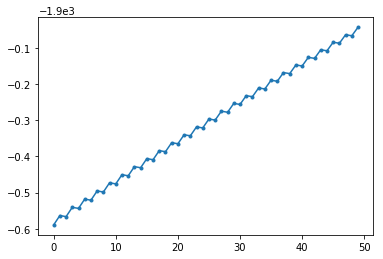

In [47]:
plt.plot(log_likelihoods_new_list[0:50], marker='.')
plt.show()